In [8]:
import numpy as np
import pandas as pd
from skimage.io import imread
import json
import matplotlib.pyplot as plt
from rtree import index
import numpy as np

#para importar funcs.py
import sys 
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
import funcs 

In [9]:
output_dir = "../Extraccion/features15k"
descriptors, mapping = funcs.load_features(output_dir)

print("Descriptores cargados:")
print(f"- Total descriptores: {descriptors.shape[0]}")
print(f"- Dimensiones descriptores: {descriptors.shape[1]}")
print(f"- Mapeo de imágenes: {len(mapping)}")

Descriptores cargados:
- Total descriptores: 15019
- Dimensiones descriptores: 44
- Mapeo de imágenes: 15019


In [14]:
class Rtree:
    def __init__(self, _descriptors, _dimension):
        self.descriptors = _descriptors
        self.dimension = _dimension
        self.idx = None  
        self.create_rtree_index()

    def create_rtree_index(self):
        p = index.Property()
        p.dimension = self.dimension  # Dimensión de los embeddings faciales
        self.idx = index.Index(properties=p)
        
        for i, descriptor in enumerate(self.descriptors):
            # Usamos cada dimensión como límite inferior y superior
            self.idx.insert(i, tuple(descriptor) + tuple(descriptor))
        return self.idx

    # Búsqueda KNN usando R-Tree
    def knn_rtree(self, query_vector, k=5):
        nearest_neighbors = list(self.idx.nearest(tuple(query_vector) + tuple(query_vector), k))
        return [(i, funcs.euclidean_distance(query_vector, self.descriptors[i])) for i in nearest_neighbors]


In [ ]:
rtree = Rtree(descriptors, 44)

Query:  7977


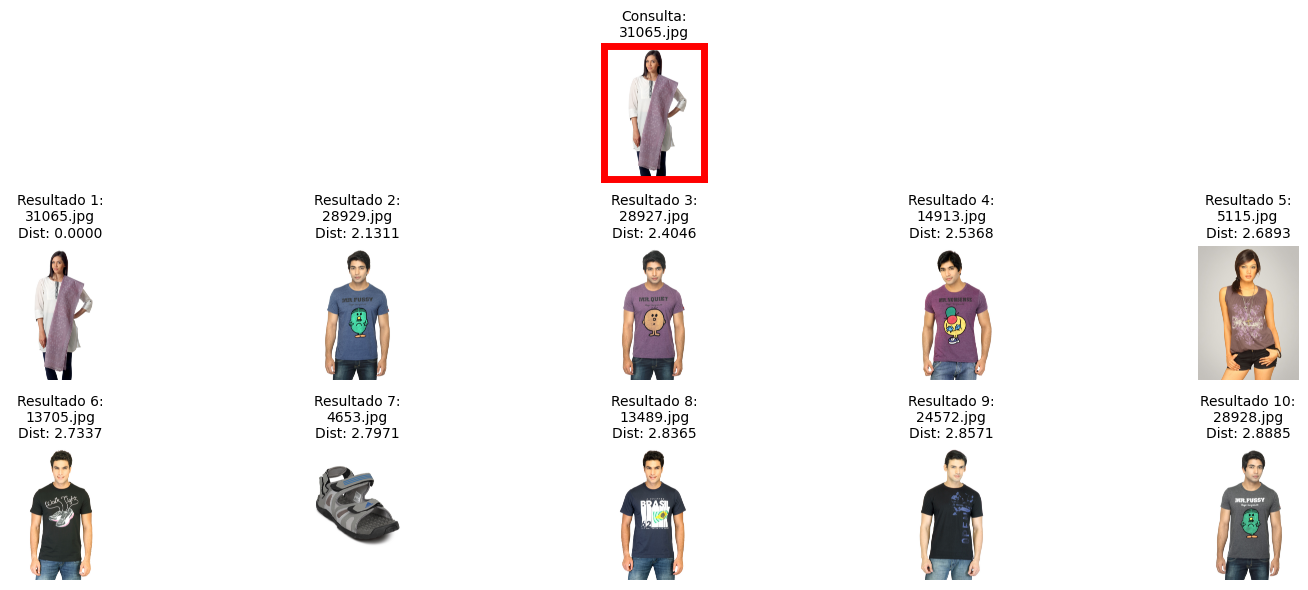

In [15]:
random = 7977#funcs.select_random_query(descriptors)# Imagen aleatoria del dataset
print("Query: ", random)
query_vector = descriptors[random]

k = 10
rtree_result = rtree.knn_rtree(query_vector, k)

funcs.show_results(rtree_result, output_dir, random, k)